<a href="https://colab.research.google.com/github/Lagstill/Federated-ML/blob/main/19PD05_FEDML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FEDERATED LEARNING**

**AMCS, PSG TECH**

**19pd04 && 19pd05**



> FMNIST DATASET LOADED

> AND THE FED ML TECHNIQUES APPLIED





# *Import the necessary libraries*

In [ ]:
import sys
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch as th
%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

import torch as th
from torchvision import transforms
import torchvision.datasets as datasets
from torch.utils.data import Subset

from torch import nn
import torch.nn.functional as F
from torch import optim

import syft as sy
import helper

*A library for computing on data you do not own and cannot see · PySyft is a Python library for secure and private Deep Learning.*

In [ ]:
pip install syft==0.2.9 --user

     |████████████████████████████████| 433 kB 34.5 MB/s 
     |████████████████████████████████| 57 kB 5.3 MB/s 
     |████████████████████████████████| 73 kB 2.2 MB/s 
     |████████████████████████████████| 753.4 MB 5.8 kB/s 
     |████████████████████████████████| 9.0 MB 66.4 MB/s 
     |████████████████████████████████| 2.0 MB 20.2 MB/s 
     |████████████████████████████████| 4.0 MB 34.7 MB/s 
     |████████████████████████████████| 79 kB 8.2 MB/s 
     |████████████████████████████████| 484 kB 35.0 MB/s 
     |████████████████████████████████| 20.1 MB 1.4 MB/s 
     |████████████████████████████████| 1.8 MB 22.1 MB/s 
     |████████████████████████████████| 126 kB 53.6 MB/s 
     |████████████████████████████████| 200 kB 47.6 MB/s 
     |████████████████████████████████| 449 kB 47.0 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |███████████████████

In [ ]:
pip install syft --user

  Using cached torchvision-0.9.1-cp38-cp38-win_amd64.whl (852 kB)
Note: you may need to restart the kernel to use updated packages.


## *Load the dataset from the keras libarary and split the labels since the dataset is huge*

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

# *Each image is 28 x 28 and of 60000 size*




In [ ]:
train_images.shape

(60000, 28, 28)


## *Naming the labels in the dataset* 

In [ ]:
labeling= ['T-shirt', 'shorts', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range (0,10):
    print(i,"=====>",labeling[i])

0 =====> T-shirt
1 =====> shorts
2 =====> Pullover
3 =====> Dress
4 =====> Coat
5 =====> Sandal
6 =====> Shirt
7 =====> Sneaker
8 =====> Bag
9 =====> Ankle boot


# *visualising the labels,random sampling*

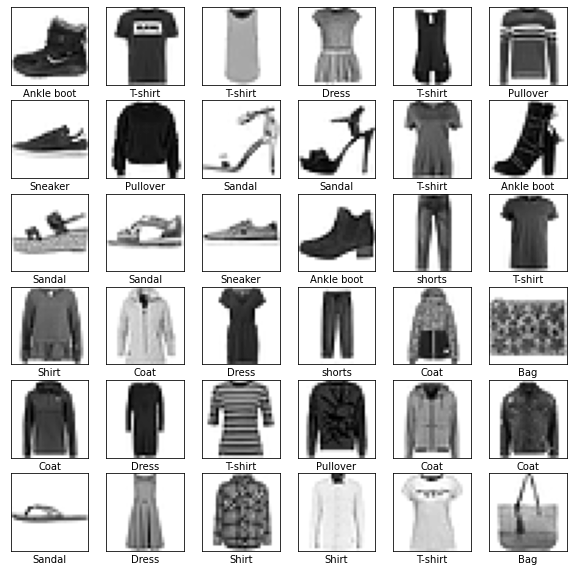

In [ ]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labeling[train_labels[i]])
plt.show()

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# *Splitting the dataset into train of 200 data points*

In [ ]:
train1 = train_images[:200]

In [ ]:
label1=train_labels[:200]

In [ ]:
df = pd.DataFrame(train_labels)
df=df.rename(columns={0: "label"})

# *Visualing the images as array 2D array : 0's and 1's*

In [ ]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# **Checking the distribution of the types of clothes in the dataset, all are uniformily distributed from the graph below**

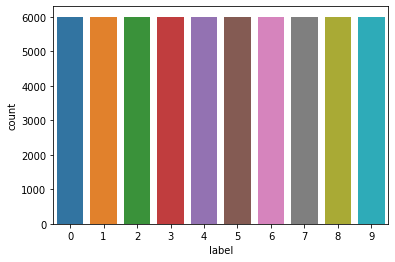

In [ ]:
ax = sns.countplot(x="label", data=df)

# *Counting the occurences = 6000*

In [ ]:
y_value=np.zeros((1,10))
for i in range (10):
    print("occurance of ",i,"=",np.count_nonzero(train_labels==i))
    y_value[0,i-1]= np.count_nonzero(train_labels==i)

occurance of  0 = 6000
occurance of  1 = 6000
occurance of  2 = 6000
occurance of  3 = 6000
occurance of  4 = 6000
occurance of  5 = 6000
occurance of  6 = 6000
occurance of  7 = 6000
occurance of  8 = 6000
occurance of  9 = 6000


# **DATA- PREPROCESSING:**

# *Normalising (min-max) the data , gives better representation of each image*

In [ ]:
def normalize(data):
    mean = np.mean(data, axis=1, keepdims=True)
    std = np.std(data, axis=1, keepdims=True)
    data_normalized = (data - mean)/std
    return data_normalized

In [ ]:
df= normalize(train_images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.




1.  **Reshaping the trained data into 28*28 for further processing**
2.  **converting the datatypes into float,for further modelling** 



In [ ]:
train1 =train1.reshape(-1, 28**2)

In [ ]:
label1 = label1.astype('float64')

In [ ]:
train1 = train1.astype('float64')

# **Designing ONE-VS-REST method:**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train1,label1, test_size=0.20, random_state=42)
Y_train = Y_train.reshape(Y_train.shape[0],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)
print("The shape of the training set feature matrix is:", X_train.shape)
print("The shape of the training label vector is:", Y_train.shape)
print("The shape of the test set feature matrix is:", X_test.shape)
print("The shape of the test label vector is:", Y_test.shape)

The shape of the training set feature matrix is: (160, 784)
The shape of the training label vector is: (160, 1)
The shape of the test set feature matrix is: (40, 784)
The shape of the test label vector is: (40, 1)


# *Creating training label for each and every clothing type*

In [ ]:
Y_train_0=(Y_train==0).astype(int)
Y_train_1=(Y_train==1).astype(int)
Y_train_2=(Y_train==2).astype(int)
Y_train_3=(Y_train==3).astype(int)
Y_train_4=(Y_train==4).astype(int)
Y_train_5=(Y_train==5).astype(int)
Y_train_6=(Y_train==6).astype(int)
Y_train_7=(Y_train==7).astype(int)
Y_train_8=(Y_train==8).astype(int)
Y_train_9=(Y_train==9).astype(int)

# *Creating testing label for each and every clothing type*

In [ ]:
Y_test_0=(Y_test==0).astype(int)
Y_test_1=(Y_test==1).astype(int)
Y_test_2=(Y_test==2).astype(int)
Y_test_3=(Y_test==3).astype(int)
Y_test_4=(Y_test==4).astype(int)
Y_test_5=(Y_test==5).astype(int)
Y_test_6=(Y_test==6).astype(int)
Y_test_7=(Y_test==7).astype(int)
Y_test_8=(Y_test==8).astype(int)
Y_test_9=(Y_test==9).astype(int)


# **Designing the mathematical model:**

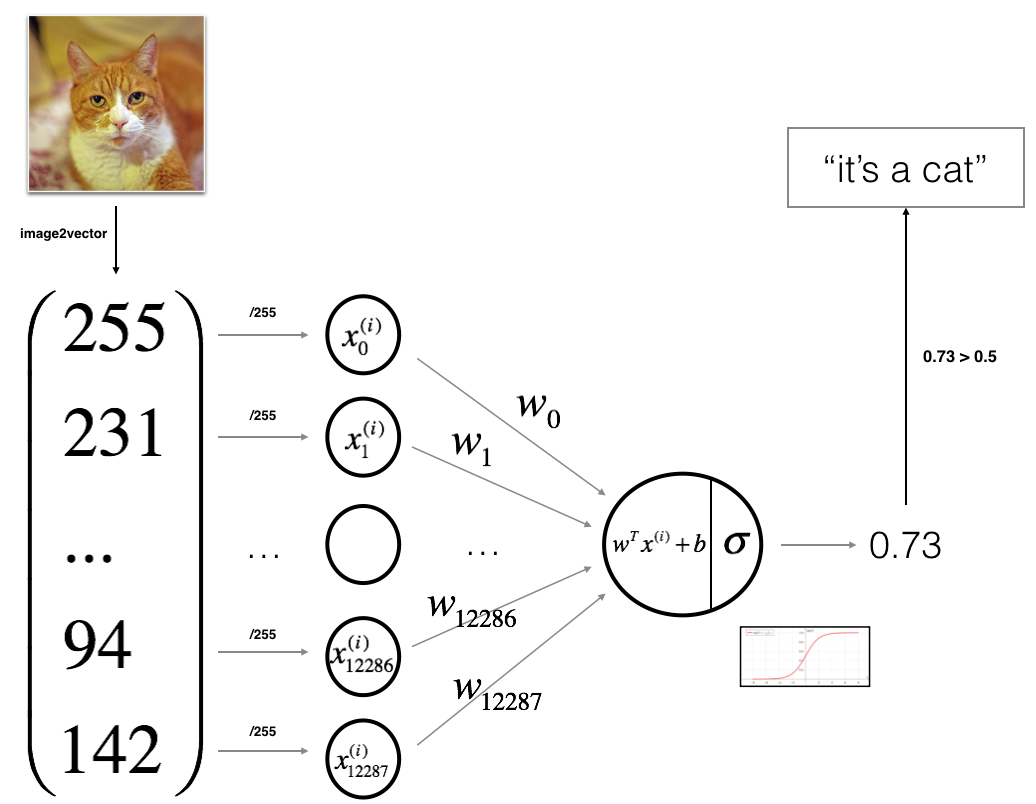

## *Initially parameters Weight as zero, and bias as zero*

In [ ]:
def initializer(nbr_features):
    W = np.zeros((nbr_features,1))
    B = 0
    return W, B

### *Since we use are going to implement logistic regression over neural networks,we use here the activation function : sigmoid*

In [ ]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

### *Forward propogation : Initialising the weight and bias for the input layer,and calculating the*

*The neural network aspect of this implementation is the use of a forward and backward propagation to claculate the value of the cost function and the partial derivatives of the cost function with respect to weights and the bias.*

1.   Sigmoid  (activation) function
2.   Cost function : J
3.   Partiatial derivatives : For both weights and bias






In [ ]:
def ForwardBackProp(X, Y, W, B):
    m = X.shape[0] 
    dw = np.zeros((W.shape[0],1))
    dB = 0
    
    Z = np.dot(X,W)+B
    Yhat = sigmoid(Z) 
    J = -(1/m+1)*(np.dot(Y.T,np.log(Yhat))+np.dot((1-Y).T,np.log(1-Yhat)))
    dW = (1/m)*np.dot(X.T,(Yhat-Y))
    dB = (1/m)*np.sum(Yhat-Y)
    return J, dW, dB


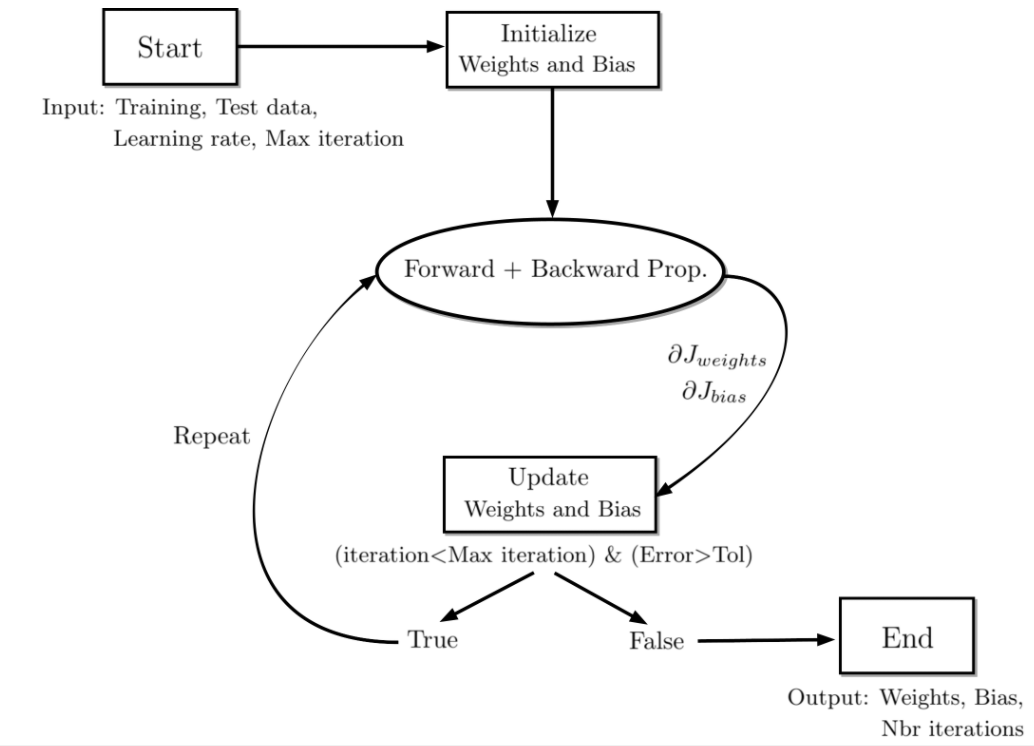

### *Based on the y_hat probability from the sigmoid function .And rounding of, to binary classify*

In [ ]:
def predict(X,W,B):
    Yhat_prob = sigmoid(np.dot(X,W)+B)
    Yhat = np.round(Yhat_prob).astype(int)
    return Yhat, Yhat_prob

### *Prediction and weight updation method:[Stochastic gradient descent]*

In [ ]:
def gradient_descent(X, Y, W, B, eta, max_iter):
    i=0
    cost_history=[]   
    while (i<max_iter):
        J, dW, dB = ForwardBackProp(X,Y,W,B)
        W = W - eta*dW
        B = B - eta*dB
        cost_history.append(J)
        Yhat, _ = predict(X,W,B)
        i+=1
    return cost_history, W, B, i


### *Creating the logisic Regression model* 

In [ ]:
def Log(X_train, X_test, Y_train, Y_test, eta, max_iter):
    
    features = X_train.shape[1]
    W, B = initializer(features)
    cost_history, W, B, i = gradient_descent(X_train, Y_train, W, B, eta, max_iter)
    Yhat_train, _ = predict(X_train, W, B)
    Yhat, _ = predict(X_test, W, B)

    model = {"weights": W,
            "bias": B,
            "train_accuracy": accuracy_score(Y_train, Yhat_train),
            "test_accuracy": accuracy_score(Y_test, Yhat),
            "confusion_matrix": confusion_matrix(Y_test, Yhat, normalize='true'),
            "cost_history": cost_history}
            
    return model

### *By one-vs rest method, each clothes type has a logistic model contructed , via SGD and cross entropy, and the 10 models are updated.*


In [ ]:
models_list=[]
models_name_list=['model_0','model_1','model_2','model_3','model_4','model_5','model_6',
                 'model_7','model_8','model_9']
Y_train_list=[Y_train_0,Y_train_1,Y_train_2,Y_train_3,Y_train_4,Y_train_5,Y_train_6,
             Y_train_7,Y_train_8,Y_train_9]
Y_test_list = [Y_test_0,Y_test_1,Y_test_2,Y_test_3,Y_test_4,Y_test_5,Y_test_6,Y_test_7,
              Y_test_8,Y_test_9]
print('Training of a classifier for each item:')
for i in range(10):
    print('Training of the model: ', models_name_list[i],', to recognize the item: ',i)
    model = Log(X_train, X_test, Y_train_list[i], Y_test_list[i], eta=0.01, max_iter=2000)
    print('Training completed!')
    print('Accuracy:', model['test_accuracy'])
    print('-'*60)
    models_list.append(model)

Training of a classifier for each item:
Training of the model:  model_0 , to recognize the item:  0
[]]
Training completed!
Accuracy: 0.875
------------------------------------------------------------
Training of the model:  model_1 , to recognize the item:  1
[]]
Training completed!
Accuracy: 1.0
------------------------------------------------------------
Training of the model:  model_2 , to recognize the item:  2
[]]
Training completed!
Accuracy: 0.95
------------------------------------------------------------
Training of the model:  model_3 , to recognize the item:  3
[]]
Training completed!
Accuracy: 0.975
------------------------------------------------------------
Training of the model:  model_4 , to recognize the item:  4
[]]
Training completed!
Accuracy: 0.875
------------------------------------------------------------
Training of the model:  model_5 , to recognize the it

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher

]
Training completed!
Accuracy: 0.875
------------------------------------------------------------
Training of the model:  model_9 , to recognize the item:  9
[]]
Training completed!
Accuracy: 0.9
------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


## *Average accuracy of the model*

In [ ]:
accuracy_list=[]
for i in range(len(models_list)):
    accuracy_list.append(models_list[i]['test_accuracy'])
one_vs_rest_accuracy=np.mean(accuracy_list)
print('The accuracy of the One-Vs-Rest model is:', one_vs_rest_accuracy)

The accuracy of the One-Vs-Rest model is: 0.9200000000000002


### *Creating a test : BY ONE VS REST method,having the accuracy attained max, deploying the respective weights and bias.*


In [ ]:
def one_vs_rest(data, models_list):
    pred_matrix = np.zeros((data.shape[0],10))
    for i in range(len(models_list)):
        W = models_list[i]['weights']
        B = models_list[i]['bias']
        Yhat, Yhat_prob = predict(data,W,B)
        pred_matrix[:,i] = Yhat_prob.T
    max_prob_vec = np.amax(pred_matrix, axis=1, keepdims=True) #maximum along the axis
    pred_matrix_max_prob = (pred_matrix == max_prob_vec).astype(int)
    labels=[]
    for j in range(pred_matrix_max_prob.shape[0]):
        idx = np.where(pred_matrix_max_prob[j,:]==1)
        labels.append(idx)
    labels = np.vstack(labels).flatten()  #arrange array vertically
    return labels

### *Now collecting, random six sample points and predicting , where we found out 1/6 returned false, rest were predicted accurately*.


In [ ]:
no =6
index_random_sample = np.random.randint(70, size=(1,no))
ex = train1[index_random_sample].reshape(no ,784)
true_labels = label1[index_random_sample].flatten().astype(int)
label = one_vs_rest(ex, models_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


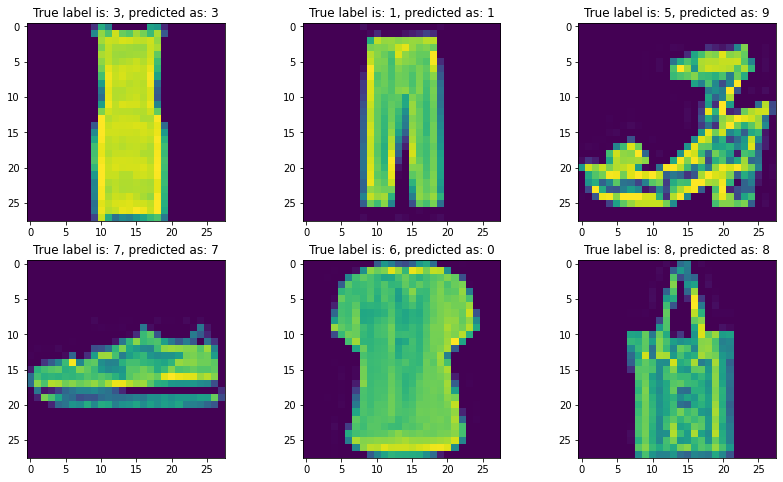

In [ ]:
plt.figure(figsize=(14,8))
for i in range(examples_number):
    image = example[i].reshape(28,28)
    plt.subplot(2,3,i+1)
    plt.imshow(image)
    title = f"True label is: {true_labels[i]}, predicted as: {label[i]}"
    plt.title(title)


# **Applying Federated learning concepts on FMNIST dataset**

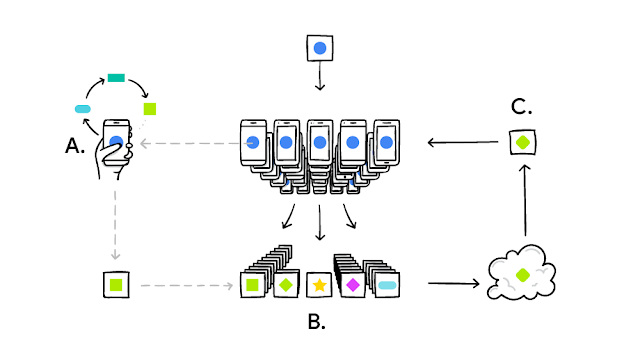

*extend torch methods to allow for the moving of tensors from one worker to another.*


In [ ]:
hook = sy.TorchHook(th)

*Now using the syft module we create 4 virtual workers with the respective ID's as depicted below:*


In [ ]:
def create_workers():
  workers = []
  WORKER1 = sy.VirtualWorker(hook, id = "WORKER1")
  workers.append(WORKER1)
  WORKER2 = sy.VirtualWorker(hook, id = "WORKER2")
  workers.append(WORKER2)
  WORKER3 = sy.VirtualWorker(hook, id = "WORKER3")
  workers.append(WORKER3)
  WORKER4 = sy.VirtualWorker(hook, id = "WORKER4")
  workers.append(WORKER4)
  
  return workers

*When we represent data for machine learning, this generally needs to be done numerically. Especially when referring specifically of neural network data representation, this is accomplished via a data repository known as the tensor. This function clears the tensor , similar to the windows, 'cls' command, for every virtual worker that we had created*


In [ ]:
def clear_workers(workers):
  for worker in workers:
    worker.clear_objects()

*Now this is a function that splits federated test and train dataset for each and ever worker using sy loader and torch lib.*


In [ ]:
def refined_df(w, train_, test_):
  fed_train_loader = sy.FederatedDataLoader(train_.federate(w), batch_size=32)
  fed_test_loader = th.utils.data.DataLoader(test_, batch_size=64)
  return fed_train_loader, fed_test_loader

*Secondly, we define the model. update the classifier algorithm to each and every class and use SGD as before for optimisation i.e., updating the optimum weights and bias*


In [ ]:
def create_models(workers, lr):
  remoteModels = list()
  remoteOptimizers = list()
  for worker in workers:
    model = classifier()
    model = model.send(worker)  #send data from one socket to another socket
    remoteOptimizers.append(optim.SGD(model.parameters(), lr))
    remoteModels.append(model)
  return remoteModels, remoteOptimizers

*Function to train models on the virtual workers without moving any gradients to the central model until the gradients have been.*


1.  Integer to keep up with first index. ---i
2.   Integer to keep up with current worker while training ---j
3.  Variable to keep up with current worker while looping ---count_idx
4.   Variable to store cummulative loss. --- cum_loss



In [ ]:
def fed_ml(workers, loader, lr = 0.12, epoch = 5):
  virtual_models, virtual_optimizers = create_models(workers, lr)
  criterion = nn.NLLLoss()
  for n in range(epoch):
    i = 0
    j = 0
    count = 0
    dbLoc = None
    cum_loss = 0
    for count_idx, (imgs, labels) in enumerate(loader):      
      if i == 0:
        i = 2
        dbLoc = imgs.location        
      if dbLoc is not imgs.location:
        print("The total loss for {0} for epoch {2} is {1}".format(workers[j].id, cum_loss / count, n+1))
        dbLoc = imgs.location
        j += 1             
        cum_loss = 0 #new- worker
        count = 0
      virtual_optimizers[j].zero_grad()
      output = virtual_models[j].fwd(imgs)
      loss = criterion(output, labels)
      loss.backward()
      virtual_optimizers[j].step()
      cum_loss +=  loss.get().item()
      count += 1
    print("The total loss for {0} is {1}".format(workers[j].id, cum_loss / count))
  return virtual_models

*Function to return the model to the central machine*

In [ ]:
def central_model(model):
  return model.get()

*Function to convert the gradients of the aggregated virtual models to their respective representation, and distribute among the provided virtual workers*


In [ ]:
def central_to_local(models, workers):
  for model in models:
    model.fc1.weight.data = model.fc1.weight.data.fix_prec().share(*workers)  #convert PyTorch Float tensors into Fixed Precision Tensors
    model.fc1.bias.data = model.fc1.bias.data.fix_prec().share(*workers)
    model.fc2.weight.data = model.fc2.weight.data.fix_prec().share(*workers)
    model.fc2.bias.data = model.fc2.bias.data.fix_prec().share(*workers)
    model.fc3.weight.data = model.fc3.weight.data.fix_prec().share(*workers)
    model.fc3.bias.data = model.fc3.bias.data.fix_prec().share(*workers)
    model.fc4.weight.data = model.fc4.weight.data.fix_prec().share(*workers)
    model.fc4.bias.data = model.fc4.bias.data.fix_prec().share(*workers)
    model.fc5.weight.data = model.fc5.weight.data.fix_prec().share(*workers)
    model.fc5.bias.data = model.fc5.bias.data.fix_prec().share(*workers)   
  return models

*Function to accumulate the gradients accross the shared devices and return the parameters*

In [ ]:
def accumulate(models):
  fc1_weight = list()
  fc1_bias = list()
  fc2_weight = list()
  fc2_bias = list()
  fc3_weight = list()
  fc3_bias = list()
  fc4_weight = list()
  fc4_bias = list()
  fc5_weight = list()
  fc5_bias = list()
  for model in models:
    fc1_weight.append(model.fc1.weight.data.clone().get())
    fc1_bias.append(model.fc1.bias.data.clone().get())
    fc2_weight.append(model.fc2.weight.data.clone().get())
    fc2_bias.append(model.fc2.bias.data.clone().get())
    fc3_weight.append(model.fc3.weight.data.clone().get())
    fc3_bias.append(model.fc3.bias.data.clone().get())
    fc4_weight.append(model.fc4.weight.data.clone().get())
    fc4_bias.append(model.fc4.bias.data.clone().get())
    fc5_weight.append(model.fc5.weight.data.clone().get())
    fc5_bias.append(model.fc5.bias.data.clone().get())
  param = {}
  param["fc1.weight"] = (sum(fc1_weight) / len(fc1_weight)).get().float_prec()
  param["fc1.bias"] = (sum(fc1_bias) / len(fc1_bias)).get().float_prec()
  param["fc2.weight"] = (sum(fc2_weight) / len(fc2_weight)).get().float_prec()
  param["fc2.bias"] = (sum(fc2_bias) / len(fc2_bias)).get().float_prec()
  param["fc3.weight"] = (sum(fc3_weight) / len(fc3_weight)).get().float_prec()
  param["fc3.bias"] = (sum(fc3_bias) / len(fc3_bias)).get().float_prec()
  param["fc4.weight"] = (sum(fc4_weight) / len(fc4_weight)).get().float_prec()
  param["fc4.bias"] = (sum(fc4_bias) / len(fc4_bias)).get().float_prec()
  param["fc5.weight"] = (sum(fc5_weight) / len(fc5_weight)).get().float_prec()
  param["fc5.bias"] = (sum(fc5_bias) / len(fc5_bias)).get().float_prec()
  return param

*Function to update the central model with the final parameters from the virtual models*

In [ ]:
def update(param):
  model = classifier()
  model.fc1.weight.data = param["fc1.weight"]
  model.fc1.bias.data = param["fc1.bias"]
  model.fc2.weight.data = param["fc2.weight"]
  model.fc2.bias.data = param["fc2.bias"]
  model.fc3.weight.data = param["fc3.weight"]
  model.fc3.bias.data = param["fc3.bias"]
  model.fc4.weight.data = param["fc4.weight"]
  model.fc4.bias.data = param["fc4.bias"]
  model.fc5.weight.data = param["fc5.weight"]
  model.fc5.bias.data = param["fc5.bias"]  
  return model

*So here initially we construct a 5 layered new network, with three hidden layers and one iput layer and one output layer, The input layer has 28*28 (cause we have 28 x 28 image, where we consider each pixel as input node)*

In [ ]:
class classifier(nn.Module):
  def __init__(self):
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 32)
    self.fc5 = nn.Linear(32, 10)
    
  def fwd(self, x):
    x = x.view(x.shape[0], -1)
    x = F.sigmoid(self.fc1(x))
    x = F.sigmoid(self.fc2(x))
    x = F.sigmoid(self.fc3(x))
    x = F.sigmoid(self.fc4(x))
    x = F.sigmoid(self.fc5(x))
    #x = F.log_softmax(self.fc5(x), dim=1)   
    return x

*then for updating weights and biases, as we used Sigmoid in the previous case,*


# **LOAD AND NORMALISE THE FMNIST DATASET, and split based on batches over to train and test**


In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
fmnist_trainset = datasets.FashionMNIST('../fashion_data', train=True, download=True, transform=transform)
fmnist_testset = datasets.FashionMNIST('../fashion_data', train=False, download=True, transform=transform)

## *Create worker function is invoked, to create virtual workes(models)and clear workers, to remove the tensors present* 

In [ ]:
vm = create_workers()
clear_workers(vm)

*Creation of federated train and test dataset,for each virtual/remote worker*

In [ ]:
f_train, f_test= refined_df(vm, fmnist_trainset, fmnist_testset)

*Setting manually the hyperparameters eta (learning rate) and the number of epochs.. the loss i.e., Negative Log Likelihood Loss is computed for each virtaul worker,and run*

In [ ]:
v_Models = fed_ml(vm,f_train , lr = 0.01, epoch = 3)

The total loss for WORKER1 for epoch 1 is 1.0288646285976175
The total loss for WORKER2 for epoch 1 is 1.0318145462826116
The total loss for WORKER3 for epoch 1 is 1.0403157714396907
The total loss for WORKER4 is 1.0291136047606275
The total loss for WORKER1 for epoch 2 is 0.5727161808944206
The total loss for WORKER2 for epoch 2 is 0.5642313579125191
The total loss for WORKER3 for epoch 2 is 0.5787103139578915
The total loss for WORKER4 is 0.5816153713317314
The total loss for WORKER1 for epoch 3 is 0.48785617598084247
The total loss for WORKER2 for epoch 3 is 0.48642472045889285
The total loss for WORKER3 for epoch 3 is 0.4870673342744933
The total loss for WORKER4 is 0.4988714313742194


*Now once the model is obtained virtually, it is sent to central server and again resent , i.e., the optimiser is shared.*

In [ ]:
v_Models = central_to local(v_Models, workers[0:4])
parameter  = accumulate(v_Models)

In [ ]:
v_Models

[classifier(
   (fc1): Linear(in_features=784, out_features=256, bias=True)
   (fc2): Linear(in_features=256, out_features=128, bias=True)
   (fc3): Linear(in_features=128, out_features=64, bias=True)
   (fc4): Linear(in_features=64, out_features=32, bias=True)
   (fc5): Linear(in_features=32, out_features=10, bias=True)
 ), classifier(
   (fc1): Linear(in_features=784, out_features=256, bias=True)
   (fc2): Linear(in_features=256, out_features=128, bias=True)
   (fc3): Linear(in_features=128, out_features=64, bias=True)
   (fc4): Linear(in_features=64, out_features=32, bias=True)
   (fc5): Linear(in_features=32, out_features=10, bias=True)
 ), classifier(
   (fc1): Linear(in_features=784, out_features=256, bias=True)
   (fc2): Linear(in_features=256, out_features=128, bias=True)
   (fc3): Linear(in_features=128, out_features=64, bias=True)
   (fc4): Linear(in_features=64, out_features=32, bias=True)
   (fc5): Linear(in_features=32, out_features=10, bias=True)
 ), classifier(
   (fc1):

## *The parameters ( W and b) are printed as follows:*

In [ ]:
parameter

{'fc1.bias': tensor([ 1.5000e-02, -1.0000e-02,  1.7000e-02, -9.0000e-03, -1.0000e-03,
         -4.6117e+15,  4.6117e+15,  4.6117e+15, -1.1000e-02,  4.6117e+15,
          7.0000e-03,  1.5000e-02, -3.0000e-03,  1.0000e-03,  4.6117e+15,
          5.0000e-03,  4.6117e+15,  4.0000e-03,  2.0000e-03,  8.0000e-03,
          4.6117e+15, -3.0000e-03, -1.0000e-02,  9.0000e-03, -4.6117e+15,
          0.0000e+00, -1.6000e-02,  4.6117e+15,  0.0000e+00,  1.7000e-02,
         -1.0000e-02, -4.6117e+15, -4.0000e-03,  0.0000e+00,  4.6117e+15,
          5.0000e-03, -1.6000e-02,  4.6117e+15, -4.6117e+15,  9.0000e-03,
         -4.6117e+15, -4.6117e+15, -4.6117e+15,  1.8000e-02, -1.8000e-02,
         -8.0000e-03, -1.5000e-02, -2.6000e-02, -4.6117e+15, -2.0000e-03,
          4.6117e+15,  4.6117e+15, -9.0000e-03,  4.6117e+15, -2.3000e-02,
         -1.0000e-03, -4.6117e+15, -4.6117e+15, -2.0000e-03, -1.7000e-02,
         -4.6117e+15,  0.0000e+00,  4.6117e+15, -9.0000e-03, -2.0000e-03,
         -1.5000e-02,  2.0

# **ACCURACY MEASURES**

## *Test accuracy is printed . And based on the logistic regression model trained, the multi-class confusion matrix is obtained.*

In [ ]:
 accuracy = metrics.accuracy_score(Y_test, predictions)
 accuracy 

0.7

In [ ]:
predictions = model_0.predict(X_test)

## *Classification report:*

[Classification metrics : F1 score, precision, recall]


In [ ]:
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.50      0.75      0.60         4
         1.0       0.78      1.00      0.88         7
         2.0       0.80      0.67      0.73         6
         4.0       0.67      0.50      0.57         4
         5.0       1.00      0.40      0.57         5
         6.0       0.67      0.33      0.44         6
         7.0       0.67      1.00      0.80         2
         8.0       0.67      1.00      0.80         2
         9.0       0.67      1.00      0.80         4

    accuracy                           0.70        40
   macro avg       0.71      0.74      0.69        40
weighted avg       0.73      0.70      0.68        40



## *Plotting the ROC and AUC:*

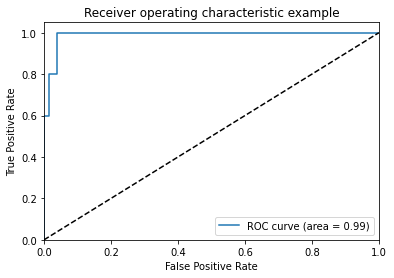

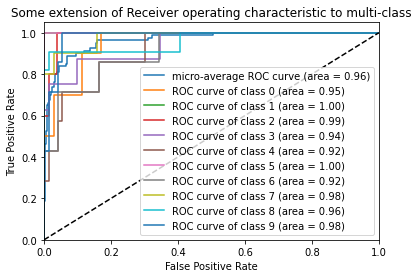

In [ ]:
y = label_binarize(Y_train, classes=[0, 1, 2,3,4,5,6,7,8,9])
n_classes = y.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# **Conclusion:**


> Federated Learning is simply the decentralized form of Machine Learning. In Machine Learning, we usually train our data that is aggregated from several edge devices like mobile phones, laptops, etc. and is brought together to a centralized server. Machine Learning algorithms, then grab this data and trains itself and finally predicts results for new data generated.


> Federated Learning is still in its early stages and faces numerous challenges with its design and deployment. A good way to tackle this challenge is by defining the Federated Learning problem and designing a data pipeline such that it can be properly productionized.



> Hence in this notebook we explored Image classification via logistic regression to neural networks, and deployed federated ML model on it, though the accuracy achieved was 0.70 rather than the local model trained (0.92), privacy and security was better increased in the latter.


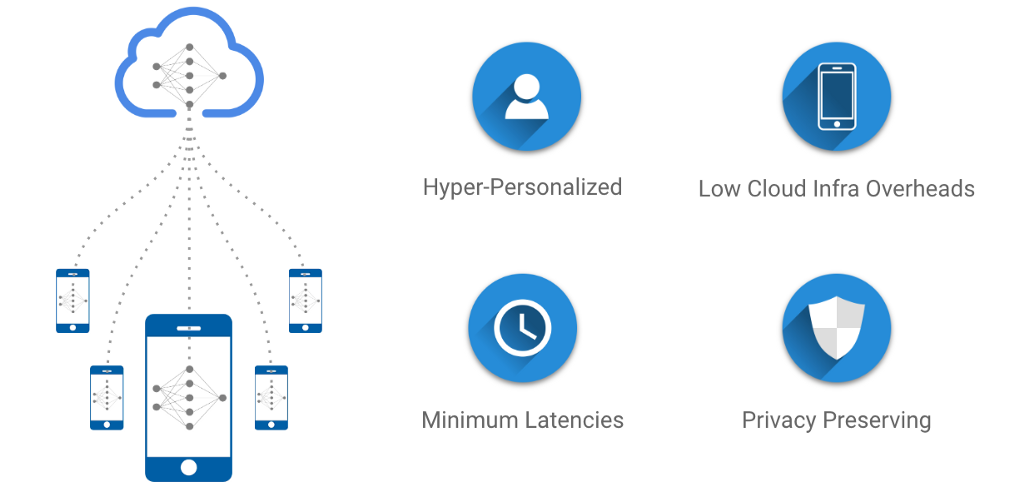





